In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.9.2'

##Setting The Data up##

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

#Normlizing pixels into a number between 1-0
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 13s 0us/step


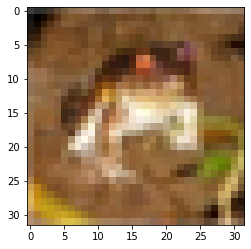

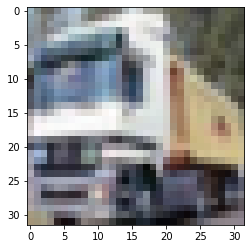

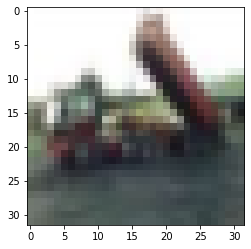

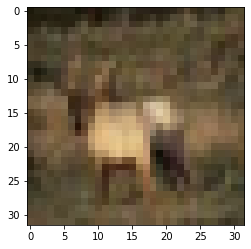

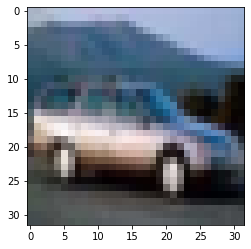

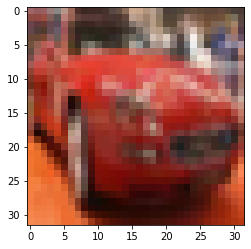

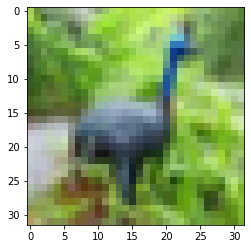

In [29]:
#Taking a Look at The Data
import matplotlib.pyplot as plt

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i in range(7):
  plt.imshow(train_images[i])
  
  plt.show()


##Create Model


In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))




In [14]:
#Let's take a look at the model base
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

##Compile and Train Model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))


Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5370 - accuracy: 0.8109 - val_loss: 0.8785 - val_accuracy: 0.7134
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5099 - accuracy: 0.8191 - val_loss: 0.9436 - val_accuracy: 0.6984
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4830 - accuracy: 0.8287 - val_loss: 0.9147 - val_accuracy: 0.7154
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4585 - accuracy: 0.8380 - val_loss: 0.9711 - val_accuracy: 0.7033
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4397 - accuracy: 0.8439 - val_loss: 1.0293 - val_accuracy: 0.7009
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4222 - accuracy: 0.8504 - val_loss: 1.0329 - val_accuracy: 0.7044
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3946 - accuracy: 0.8585 - val_loss: 1.0409 - val_accuracy:

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.6720 - accuracy: 0.6815


#Confusion Matrix

In [27]:
import numpy as np

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)



313/313 [==============================] - 1s 2ms/step


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

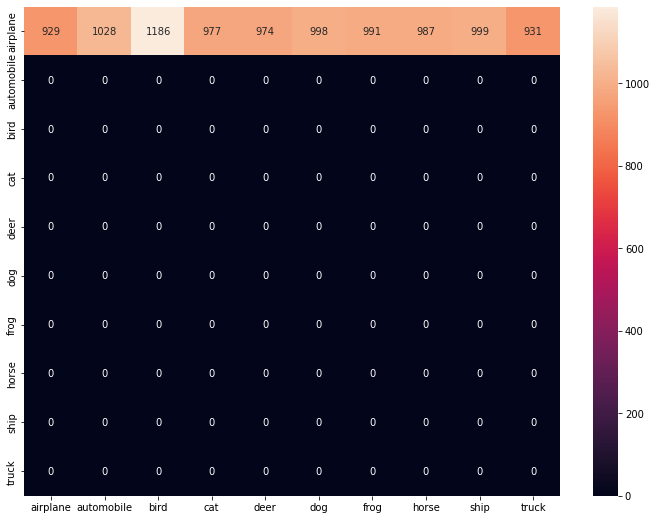

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)